In [125]:
from utils import *
from QgSVM_utils import *


def Gkernel(xn, xm, gamma=-1): # here (xn.shape: NxD, xm.shape: ...xD) -> Nx...
    if gamma == -1:
        return xn @ xm.T
    xn = np.atleast_2d(xn)
    xm = np.atleast_2d(xm)
    return np.exp(-gamma * np.sum((xn[:,None] - xm[None,:])**2, axis=-1)) # (N,1,D) - (1,...,D) -> (N,...,D) -> (N,...); see Hsu guide.pdf for formula

gamma=2


id_dataset='MNIST09'
X_train,X_test, Y_train, Y_test = load_MNIST(n=15, seed=123, test_size=.5, n_comp=gamma, class0=0, class1=9)


47.3% of total variance is explained by 2 principal components


In [126]:
X_trainp = X_train*np.pi/2

In [127]:
X_testp = X_test*np.pi/2

In [128]:
# Gren = Gkernel(X_train,X_train,gamma)
# Qkren = kernel(X_train,X_train,gamma)

Gren = Gkernel(X_trainp,X_trainp,gamma)
Qkren = kernel(X_trainp,X_trainp,1)


<Figure size 640x480 with 0 Axes>

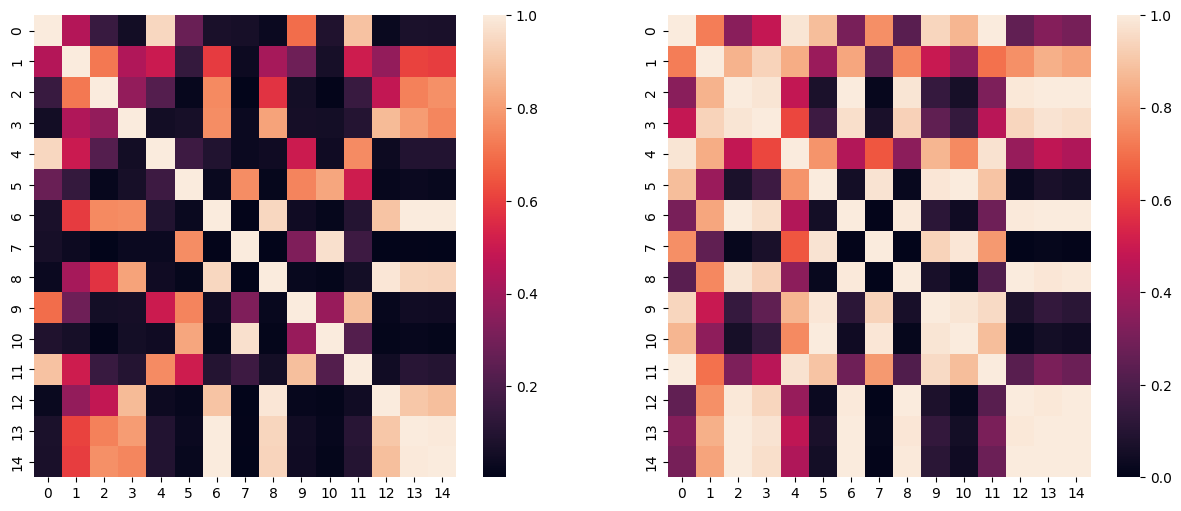

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
sns.heatmap(Gren, ax=ax1)
sns.heatmap(Qkren, ax=ax2)
plt.show()


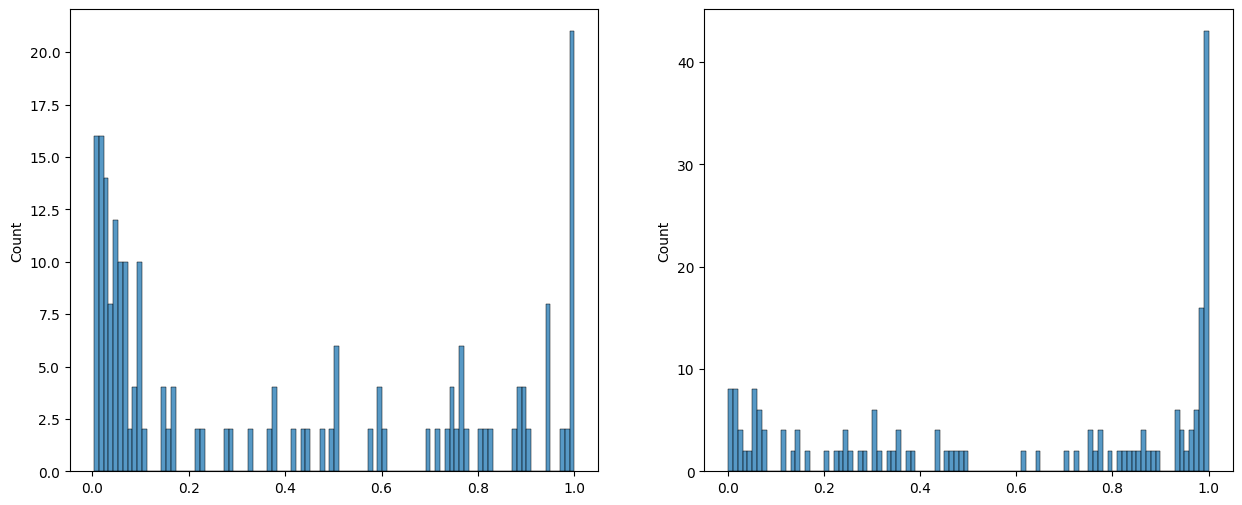

In [130]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
sns.histplot(Gren.flatten(), bins = 100, ax = ax1);

sns.histplot(Qkren.flatten(), bins = 100, ax = ax2);


In [131]:
for i,el in enumerate(X_train):
    print(el)
    for j,ul in enumerate(X_train):
        print(f'{el[0]:.2},{ul[0]:.2} sono simili: || {Gren[i,j]:.3} C || {Qkren[i,j]:.3} Q ||')

[0.6804 0.7713]
0.68,0.68 sono simili: || 1.0 C || 1.0 Q ||
0.68,0.33 sono simili: || 0.444 C || 0.728 Q ||
0.68,0.081 sono simili: || 0.153 C || 0.346 Q ||
0.68,0.17 sono simili: || 0.0519 C || 0.481 Q ||
0.68,0.59 sono simili: || 0.947 C || 0.982 Q ||
0.68,0.91 sono simili: || 0.276 C || 0.881 Q ||
0.68,0.054 sono simili: || 0.0715 C || 0.307 Q ||
0.68,1.0 sono simili: || 0.0649 C || 0.768 Q ||
0.68,0.0 sono simili: || 0.0345 C || 0.232 Q ||
0.68,0.84 sono simili: || 0.693 C || 0.942 Q ||
0.68,0.92 sono simili: || 0.0886 C || 0.861 Q ||
0.68,0.7 sono simili: || 0.893 C || 0.999 Q ||
0.68,0.014 sono simili: || 0.0292 C || 0.25 Q ||
0.68,0.074 sono simili: || 0.0765 C || 0.336 Q ||
0.68,0.051 sono simili: || 0.0722 C || 0.302 Q ||
[0.3312 0.5648]
0.33,0.68 sono simili: || 0.444 C || 0.728 Q ||
0.33,0.33 sono simili: || 1.0 C || 1.0 Q ||
0.33,0.081 sono simili: || 0.718 C || 0.853 Q ||
0.33,0.17 sono simili: || 0.439 C || 0.936 Q ||
0.33,0.59 sono simili: || 0.502 C || 0.84 Q ||
0.33,0.